In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
%matplotlib inline


In [78]:
# Read in data.

insurance_data = pd.read_csv('insurance.csv', delimiter = ',')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
# Get summary statistics and check for any missing values.

print(f"Summary Statistics:\n{insurance_data.describe()}")
print(f"\nMissing Values:\n{insurance_data.isnull().sum()}")

Summary Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [80]:
# Define x,y variables. Reshape otherwise 1D array instead of 2D.

x = insurance_data['age'].values.reshape(-1,1)

y = insurance_data['charges']

Text(0, 0.5, 'Charges')

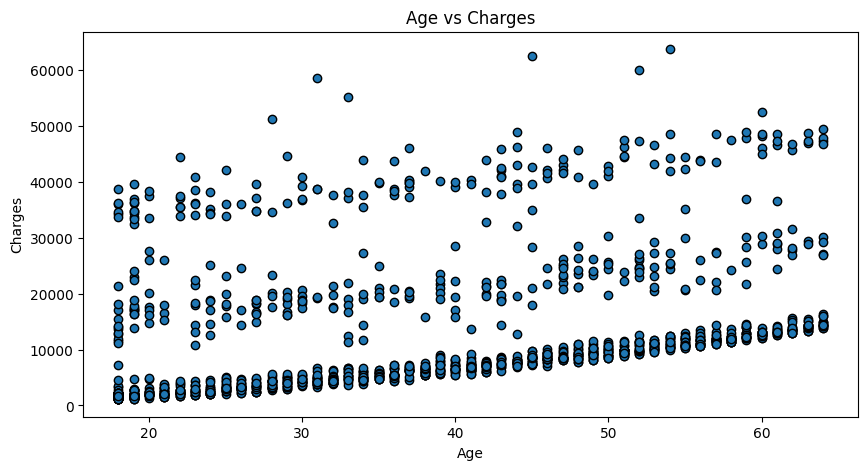

In [81]:
# Scatter plot age vs charges.

plt.figure(figsize=(10, 5))
plt.scatter(x, y, edgecolors = 'k')
plt.title("Age vs Charges")
plt.xlabel('Age')
plt.ylabel('Charges')

In [82]:
# Model training.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
# Fit model.

insurance_model = LinearRegression()
insurance_model.fit(x_train,y_train)

LinearRegression()

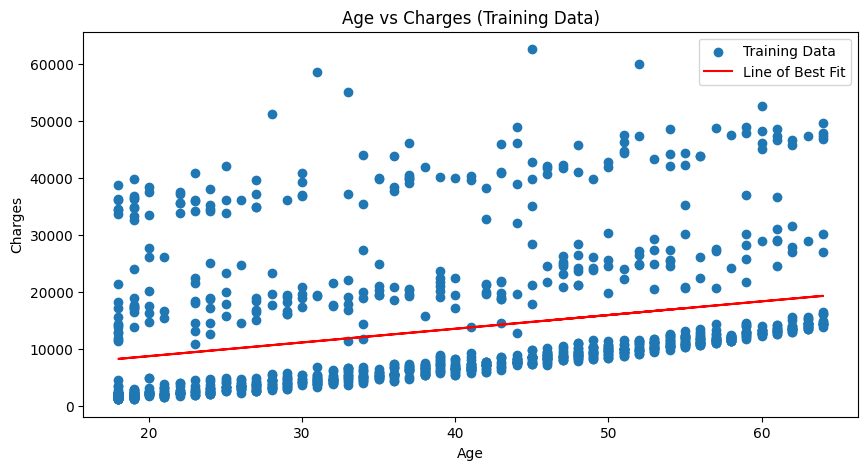

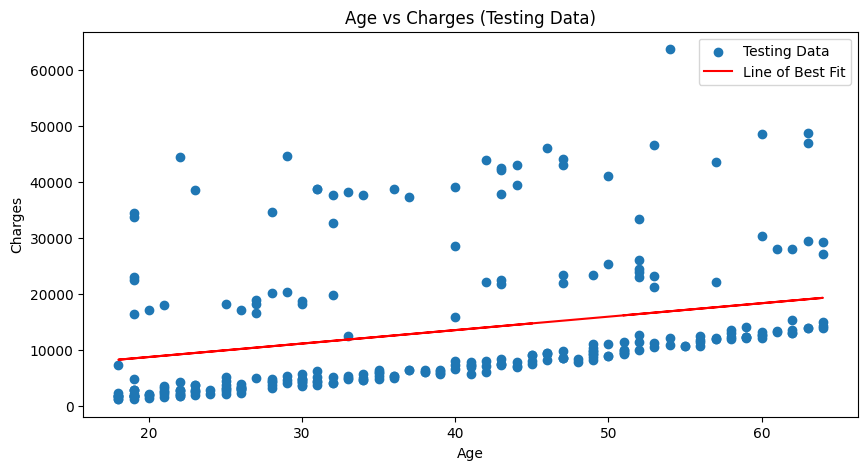

In [84]:
# Plot the line of best fit on data.

y_pred_train = insurance_model.predict(x_train)
y_pred_test = insurance_model.predict(x_test)

# Plot the line of best fit on training data.
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, label='Training Data')
plt.plot(x_train, y_pred_train, color='r', label='Line of Best Fit')
plt.title("Age vs Charges (Training Data)")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

# Plot the line of best fit on testing data.
plt.figure(figsize=(10, 5))
plt.scatter(x_test, y_test, label='Testing Data')
plt.plot(x_test, y_pred_test, color='r', label='Line of Best Fit')
plt.title("Age vs Charges (Testing Data)")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [85]:
# Model Interpretation.

print("Intercept:", insurance_model.intercept_)
print("Coefficient for Age:", insurance_model.coef_[0])
print("For each year increase in age, the charges increase by approximately", insurance_model.coef_[0], "dollars.")

Intercept: 3876.928684191691
Coefficient for Age: 240.59655978877493
For each year increase in age, the charges increase by approximately 240.59655978877493 dollars.


In [86]:
# Correlation Matrix.

corr_matrix = np.corrcoef(insurance_data['age'], insurance_data['charges'])

print(corr_matrix)

[[1.         0.29900819]
 [0.29900819 1.        ]]


Summary:


- Both the training and testing datasets show limited predictive power, with R-squared values of approximately 0.08 and 0.12, respectively.

- The MAE and MSE values are relatively high, indicating that the model's predictions deviate substantially from the actual charges.

- The r value 0.3 shows a weak postive correlation.

In [87]:
# Model Evalutation.

print("R-squared (Train):", r2_score(y_train, y_pred_train))
print("R-squared (Test):", r2_score(y_test, y_pred_test))
print("Mean Absolute Error (Train):", mean_absolute_error(y_train, y_pred_train))
print("Mean Absolute Error (Test):", mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error (Train):", mean_squared_error(y_train, y_pred_train))
print("Mean Squared Error (Test):", mean_squared_error(y_test, y_pred_test))
print(f"Correlation coefficient value: {corr_matrix[0,1]}")

R-squared (Train): 0.07936661852890337
R-squared (Test): 0.12408973539501944
Mean Absolute Error (Train): 9042.420854335864
Mean Absolute Error (Test): 9173.258196746589
Mean Squared Error (Train): 132878350.42028469
Mean Squared Error (Test): 135983957.4805469
Correlation coefficient value: 0.29900819333064776
